## Import Libraries

In [8]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Reading Data

In [23]:
df = pd.read_csv(r"C:\Users\saeid\OneDrive\Desktop\ML with Py\Projects\project2.csv")
df=pd.DataFrame(df)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Cleansing

In [35]:
df.dropna(inplace=Traue)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
df.drop_duplicates(inplace=True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration

In [37]:
df.describe()a

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(array([ 1., 10., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

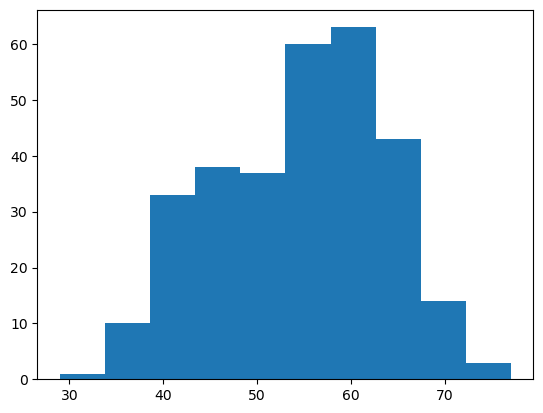

In [41]:
plt.hist(df.age)

(array([ 96.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 206.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

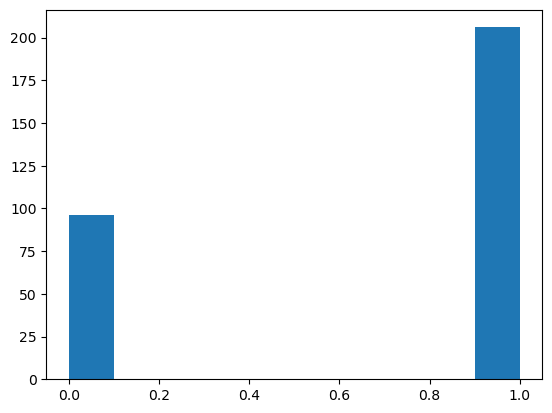

In [42]:
plt.hist(df.sex)

(array([143.,   0.,   0.,  50.,   0.,   0.,  86.,   0.,   0.,  23.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

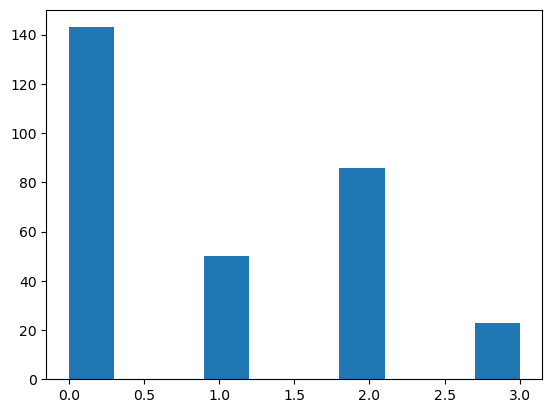

In [43]:
plt.hist(df.cp)

(array([10., 42., 67., 74., 56., 27., 13.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <BarContainer object of 10 artists>)

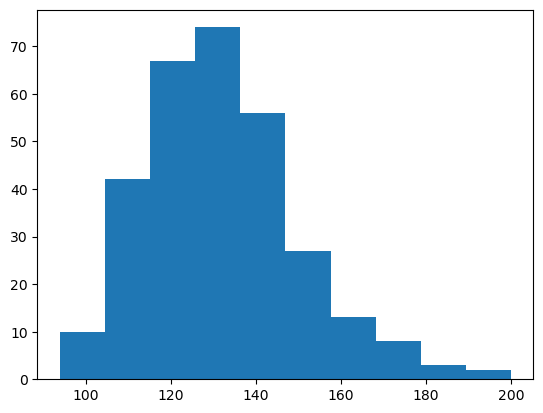

In [44]:
plt.hist(df.trtbps)

(array([ 12.,  72., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <BarContainer object of 10 artists>)

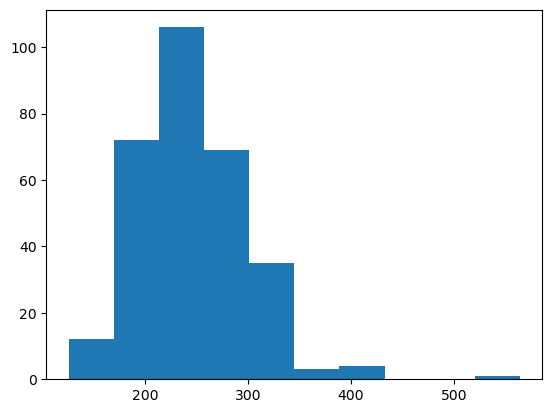

In [45]:
plt.hist(df.chol)

(array([257.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  45.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

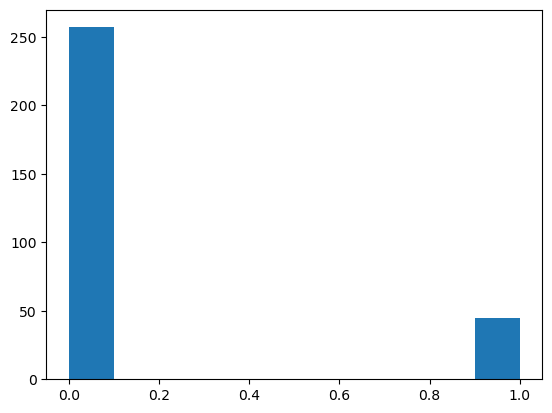

In [46]:
plt.hist(df.fbs)

(array([147.,   0.,   0.,   0.,   0., 151.,   0.,   0.,   0.,   4.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

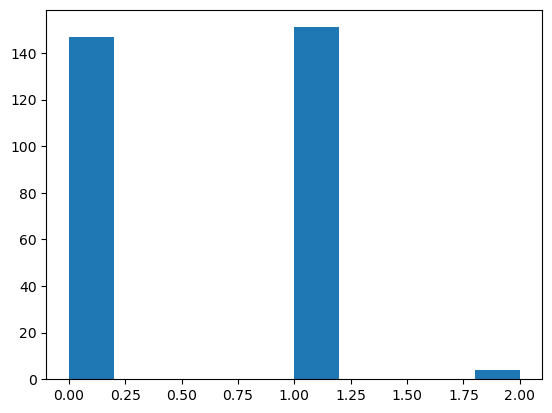

In [48]:
plt.hist(df.restecg)

(array([ 1.,  6., 11., 26., 35., 53., 77., 62., 26.,  5.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <BarContainer object of 10 artists>)

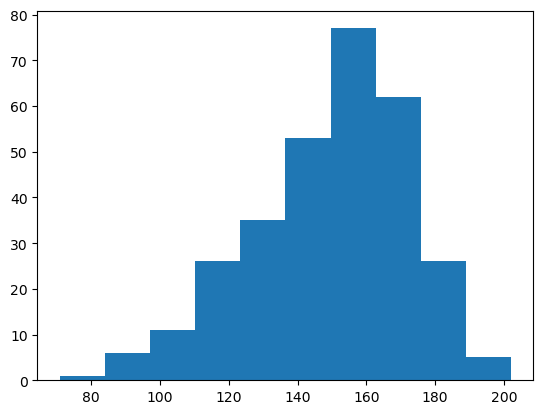

In [49]:
plt.hist(df.thalachh)

(array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  99.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

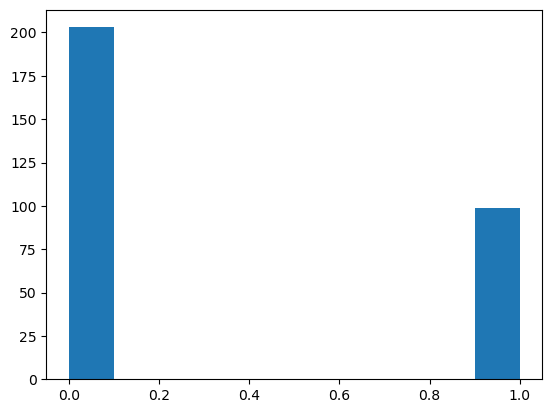

In [50]:
plt.hist(df.exng)

(array([148.,  50.,  40.,  24.,  20.,  11.,   6.,   1.,   0.,   2.]),
 array([0.  , 0.62, 1.24, 1.86, 2.48, 3.1 , 3.72, 4.34, 4.96, 5.58, 6.2 ]),
 <BarContainer object of 10 artists>)

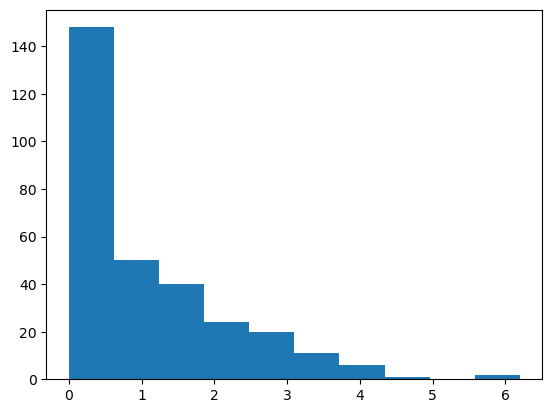

In [51]:
plt.hist(df.oldpeak)

(array([ 21.,   0.,   0.,   0.,   0., 140.,   0.,   0.,   0., 141.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

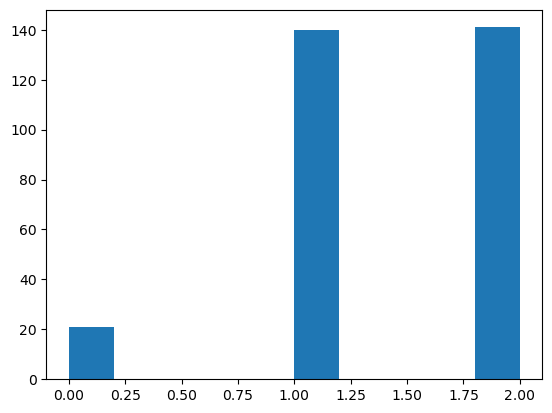

In [52]:
plt.hist(df.slp)

(array([175.,   0.,  65.,   0.,   0.,  38.,   0.,  20.,   0.,   4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

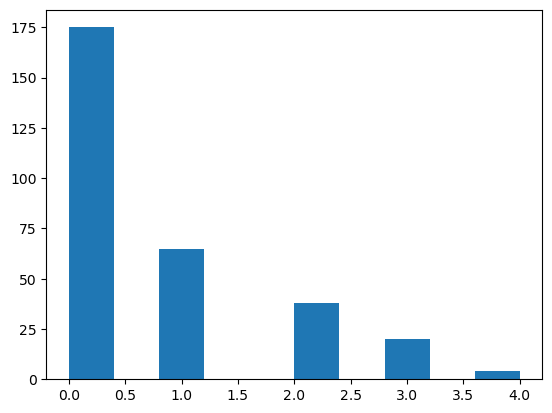

In [53]:
plt.hist(df.caa)

(array([  2.,   0.,   0.,  18.,   0.,   0., 165.,   0.,   0., 117.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

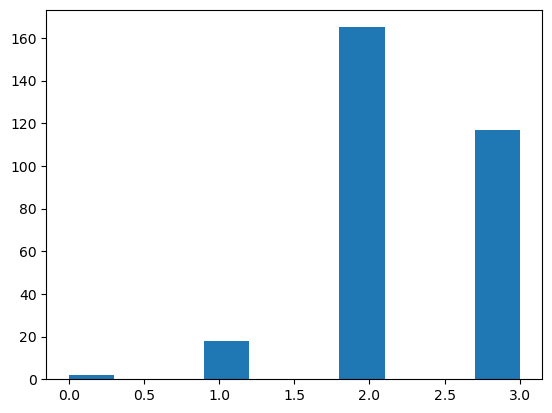

In [54]:
plt.hist(df.thall)

In [38]:
df.output.value_counts()

1    164
0    138
Name: output, dtype: int64

## So there is no outlier data and we Data is ready for training
 

## Training and Evaluaton 
## (Remember that detecting to be risked of heart atack is much more important than detecting not to be risked of heart attack, so our pos_label will be 1 that mean a person is risked of heart attack and needs to be cared)

In [57]:
X=df.drop(columns='output')
Y=df['output']
print(X)
print(Y)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

In [59]:
X_s = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_s[0:5]

array([[ 0.94979429,  0.68265615,  1.97647049,  0.76406571, -0.26128493,
         2.38979311, -1.0025412 ,  0.01882584, -0.69834428,  1.08402203,
        -2.27118179, -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , -0.09140084,  0.06774054,
        -0.41844626,  0.90165655,  1.63697881, -0.69834428,  2.11892611,
        -2.27118179, -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , -0.09140084, -0.82256367,
        -0.41844626, -1.0025412 ,  0.98097085, -0.69834428,  0.30784398,
         0.97951442, -0.71491124, -0.51399432],
       [ 0.17485599,  0.68265615,  0.0353515 , -0.66171188, -0.20322161,
        -0.41844626,  0.90165655,  1.24337404, -0.69834428, -0.20960805,
         0.97951442, -0.71491124, -0.51399432],
       [ 0.28556146, -1.46486632, -0.93520799, -0.66171188,  2.08060222,
        -0.41844626,  0.90165655,  0.58736607,  1.43195847, -0.38209207,
         0.97951442, -0.71491124, -0.51399432]])

In [63]:
from sklearn.model_selection import train_test_split
X_s_train, X_s_test, Y_train, Y_test = train_test_split( X_s, Y, test_size=0.2, random_state=4)
print ('Train set:', X_s_train.shape,  Y_train.shape)
print ('Test set:', X_s_test.shape,  Y_test.shape)

Train set: (241, 13) (241,)
Test set: (61, 13) (61,)


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (241, 13) (241,)
Test set: (61, 13) (61,)


## KNN

In [109]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
K=np.arange(1,21)
a={}
for k in K:
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_s_train,Y_train)
    Yhat_KNN = neigh.predict(X_s_test)
    f1_KNN=metrics.f1_score(Y_test, Yhat_KNN ,pos_label=1)
    a[f1_KNN]=k
The_Best_KNN=max(a) 
print(str(The_Best_KNN)+' with k = '+str(a[The_Best_KNN]))


0.8888888888888888 with k = 9


## Therefore, KNN with 9 nearest neighbors is the best model for KNN(F1_score=0.88889) .

## Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
M=[None,1,2,3,4,5,6,7,8,9,10,11,12,13]
b={}
for m in M:
    DT_Classifier=DecisionTreeClassifier(criterion='entropy',max_depth=m)
    DT_Classifier.fit(X_train,Y_train)
    Y_hat_DT=DT_Classifier.predict(X_test)
    f1_DT=metrics.f1_score(Y_test,Y_hat_DT,pos_label=1)
    b[f1_DT]=m
The_Best_DT=max(b)
print(str(The_Best_DT)+' with max_depth = '+str(b[The_Best_DT]))

    

0.8695652173913043 with max_depth = 3


## Therefore, Decision Tree  with max depth of 3  is the best model for Decision Tree(F1_score=0.86565) .

## Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression
C=np.arange(0.01,2,0.01)
Solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
d={}
e={}
f=[]
for c in C:
    for s in Solver:
        Log=LogisticRegression(C=c , solver=s).fit(X_s_train,Y_train)
        Y_hat_Log=Log.predict(X_s_test)
        f1_score_Log=metrics.f1_score(Y_test,Y_hat_Log,pos_label=1)
        d[f1_score_Log]=c
        e[f1_score_Log]=s
        f.append(f1_score_Log)
The_best_Log=max(f)  
print(The_best_Log)
print('with c = ',d[The_best_Log])
print('and solver ',e[The_best_Log])

0.8947368421052632
with c =  0.02
and solver  saga


## Therefore, Logistic Regression with c=0.02 and solver saga  is the best model for Logistic Regression(F1_score=0.89474) .

## SVM

In [141]:
kernels=['linear','poly', 'rbf', 'sigmoid']
h={}
from sklearn.metrics import f1_score
from sklearn import svm
for g in kernels:
    clf=svm.SVC(kernel=g)
    clf.fit(X_s_train,Y_train)
    Y_hat_SVM=clf.predict(X_s_test)
    f1_score_SVM=f1_score(Y_test,Y_hat_SVM,pos_label=1)
    h[f1_score_SVM]=g   
The_Best_SVM=max(h)
print(str(The_Best_SVM)+ ' with kernel '+h[The_Best_SVM])

0.8648648648648648 with kernel poly


## Therefore SVM with kernel poly is the best model for SVM(F1_score=0.86487) .

## Comparing the models
## All models trained have good score. Now let's go to compare models and select the best.

In [148]:
scores={The_Best_KNN:'KNN',The_Best_DT:'DT',The_Best_Log:'Log',The_Best_SVM:'SVM'}
The_Best_score=max(scores)
print('The best model is',scores[The_Best_score] ,' with F1_score of', The_Best_score)


The best model is Log  with F1_score of 0.8947368421052632


## So The best model for this problem is Logistic Regression(c=0.02 , solve = 'saga') and F1_score of 0.89476 .